# Loading Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
import h5py
import tabulate
import pickle
import awkward as ak

In [3]:
sys.path.append('/project/rpp-blairt2k/elrick/WatChMaL')
from watchmal.dataset.h5_dataset import H5Dataset

In [4]:
# Data paths
data_path_NB = "/project/rpp-blairt2k/gilrdzp/outputs_truth_h5_combined/mdt_iwcd_p320ka_w750m_1e17pot_2p39_wcsim_digihit.h5"
data_path_PG = "/project/rpp-blairt2k/machine_learning/data/IWCD_mPMT_Short/IWCD_mPMT_Short_emgp0_E0to1000MeV_digihits.h5"

# Particle Gun indx
electron_idx_pg_path = "/project/rpp-blairt2k/machine_learning/data/IWCD_mPMT_Short/index_lists/1class_regression/IWCD_mPMT_Short_electrons_FC.npz"
muon_idx_pg_path = "/project/rpp-blairt2k/machine_learning/data/IWCD_mPMT_Short/index_lists/1class_regression/IWCD_mPMT_Short_muons_FC.npz"

# Neut All
Neut_reco_path = "/project/rpp-blairt2k/gilrdzp/RecoAnalysis_NBS.npz"

# Files to exclude
files2exclude_path  = "/project/rpp-blairt2k/elrick/old/Notebooks/files_to_exclude.npy"


In [5]:
dataPG = H5Dataset(data_path_PG)
dataNB = H5Dataset(data_path_NB)

In [6]:
dataPG.initialize()
dataNB.initialize()

In [7]:
with np.load(electron_idx_pg_path, allow_pickle=True) as data_electron_PG:
    idxs_electron_PG = data_electron_PG['test_idxs']

with np.load(muon_idx_pg_path, allow_pickle=True) as data_muon_PG:
    idxs_muon_PG = data_muon_PG['test_idxs']

    
#Loading Exclude Files (Neutrino Beam)
files2exclude = np.load(files2exclude_path)    
    
folder_path = "/project/rpp-blairt2k/rakutsu/iwcd/mc/MassProNov2020/files/wcsim_root/NuMode/2p39_MDT_kmtsui/" 
exclude_files = [(folder_path + "mdt_iwcd_p320ka_w750m_1e17pot_2p39_wcsim.%s.root" % (str(files2exclude[i]).zfill(5))).encode('utf-8') for i in range(len(files2exclude))]

not_to_exclude = np.array([directory not in exclude_files for directory in dataNB.root_files]).T
not_to_exclude_indexes =np.where(not_to_exclude)[0]

idxs_electron_NB = np.where(((dataNB.labels == 1)) & not_to_exclude)[0]
idxs_muon_NB = np.where(((dataNB.labels == 2)) & not_to_exclude)[0]

In [8]:
mean_HT_e_PG = []
mean_HT_mu_PG = []

mean_HT_e_NB = []
mean_HT_mu_NB = []

total_HT_e_PG = []
total_HT_mu_PG = []

total_HT_e_NB = []
total_HT_mu_NB = []

In [9]:
for i in idxs_electron_PG:
    
    dataPG[i]
    
    HTmean = np.mean(dataPG.event_hit_times)
    HTtotal = np.sum(dataPG.event_hit_times)
    
    mean_HT_e_PG.append(HTmean)
    total_HT_e_PG.append(HTtotal)
    
for i in idxs_muon_PG:
    
    dataPG[i]
    
    HTmean = np.mean(dataPG.event_hit_times)
    HTtotal = np.sum(dataPG.event_hit_times)
    
    mean_HT_mu_PG.append(HTmean)
    total_HT_mu_PG.append(HTtotal)

In [10]:
for i in idxs_electron_NB:
    
    dataNB[i]
    
    HTmean = np.mean(dataNB.event_hit_times)
    HTtotal = np.sum(dataNB.event_hit_times)
    
    mean_HT_e_NB.append(HTmean)
    total_HT_e_NB.append(HTtotal)
    
for i in idxs_muon_NB:
    
    dataNB[i]
    
    HTmean = np.mean(dataNB.event_hit_times)
    HTtotal = np.sum(dataNB.event_hit_times)

    mean_HT_mu_NB.append(HTmean)
    total_HT_mu_NB.append(HTtotal)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


In [11]:
mean_HT_e_PG = np.array(mean_HT_e_PG)
mean_HT_mu_PG = np.array(mean_HT_mu_PG)

mean_HT_e_NB = np.array(mean_HT_e_NB)
mean_HT_mu_NB = np.array(mean_HT_mu_NB)

total_HT_e_PG = np.array(total_HT_e_PG)
total_HT_mu_PG = np.array(total_HT_mu_PG)

total_HT_e_NB = np.array(total_HT_e_NB)
total_HT_mu_NB = np.array(total_HT_mu_NB)

mean_HT_e_PG_idx = np.where(~np.isnan(mean_HT_e_PG))[0]
mean_HT_mu_PG_idx = np.where(~np.isnan(mean_HT_mu_PG))[0]
mean_HT_e_NB_idx = np.where(~np.isnan(mean_HT_e_NB))[0]
mean_HT_mu_NB_idx = np.where(~np.isnan(mean_HT_mu_NB))[0]
total_HT_e_PG_idx = np.where(~np.isnan(total_HT_e_PG))[0]
total_HT_mu_PG_idx = np.where(~np.isnan(total_HT_mu_PG))[0]
total_HT_e_NB_idx = np.where(~np.isnan(total_HT_e_NB))[0]
total_HT_mu_NB_idx = np.where(~np.isnan(total_HT_mu_NB))[0]

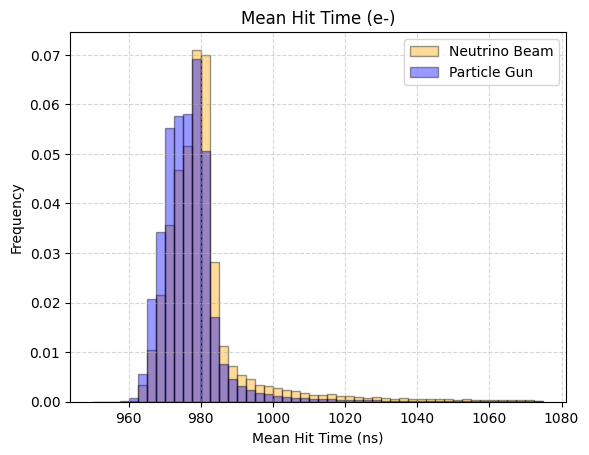

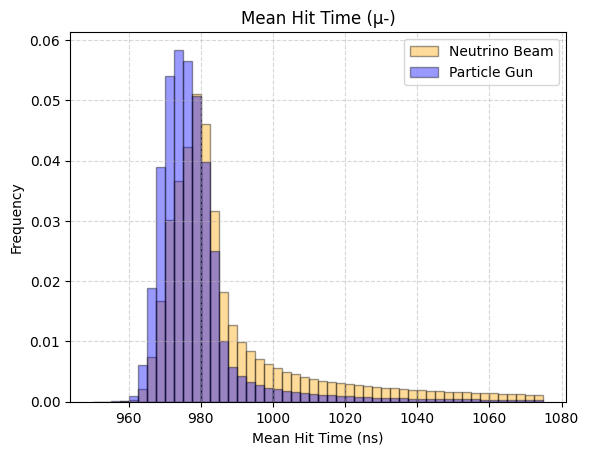

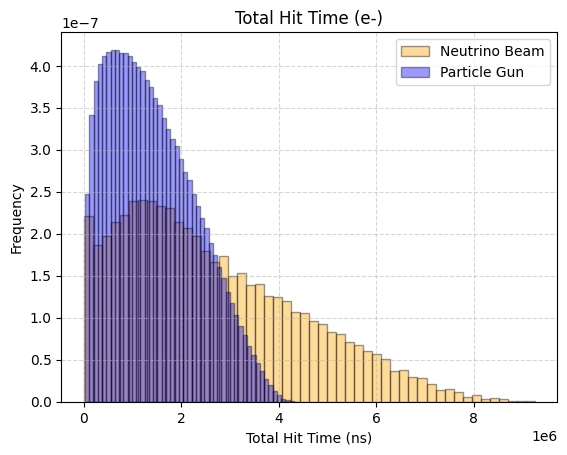

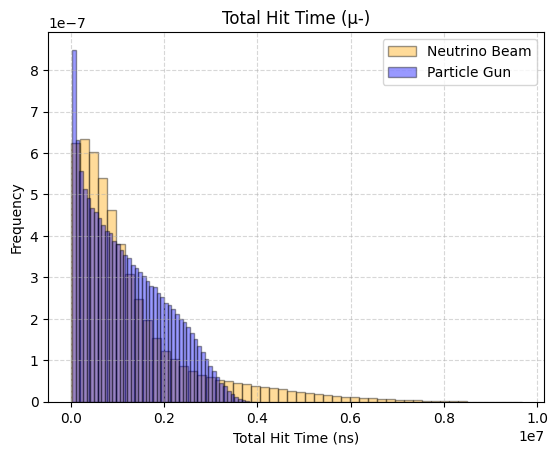

In [12]:
plt.hist(mean_HT_e_NB[mean_HT_e_NB_idx], bins=50, density=True, range=(950, 1075), alpha=0.4, color="orange", edgecolor="black",label="Neutrino Beam")  
plt.hist(mean_HT_e_PG[mean_HT_e_PG_idx], bins=50, density=True, range=(950, 1075), alpha=0.4, color="blue", edgecolor="black",label="Particle Gun")  
plt.xlabel("Mean Hit Time (ns)")  
plt.ylabel("Frequency")  
plt.title("Mean Hit Time (e-)")  
plt.grid(True, linestyle="--", alpha=0.5)  
plt.legend()
plt.show()

plt.hist(mean_HT_mu_NB[mean_HT_mu_NB_idx], bins=50, density=True, range=(950, 1075), alpha=0.4, color="orange", edgecolor="black",label="Neutrino Beam")  
plt.hist(mean_HT_mu_PG[mean_HT_mu_PG_idx], bins=50, density=True, range=(950, 1075), alpha=0.4, color="blue", edgecolor="black",label="Particle Gun")  
plt.xlabel("Mean Hit Time (ns)")  
plt.ylabel("Frequency")  
plt.title("Mean Hit Time (μ-)")  
plt.grid(True, linestyle="--", alpha=0.5)  
plt.legend()
plt.show()

plt.hist(total_HT_e_NB[total_HT_e_NB_idx], bins=50, density=True, alpha=0.4, color="orange", edgecolor="black",label="Neutrino Beam")  
plt.hist(total_HT_e_PG[total_HT_e_PG_idx], bins=50, density=True, alpha=0.4, color="blue", edgecolor="black",label="Particle Gun")  
plt.xlabel("Total Hit Time (ns)")  
plt.ylabel("Frequency")  
plt.title("Total Hit Time (e-)")  
plt.grid(True, linestyle="--", alpha=0.5)  
plt.legend()
plt.show()

plt.hist(total_HT_mu_NB[total_HT_mu_NB_idx], bins=50, density=True, alpha=0.4, color="orange", edgecolor="black",label="Neutrino Beam")  
plt.hist(total_HT_mu_PG[total_HT_mu_PG_idx], bins=50, density=True, alpha=0.4, color="blue", edgecolor="black",label="Particle Gun")  
plt.xlabel("Total Hit Time (ns)")  
plt.ylabel("Frequency")  
plt.title("Total Hit Time (μ-)")  
plt.grid(True, linestyle="--", alpha=0.5)  
plt.legend()
plt.show()

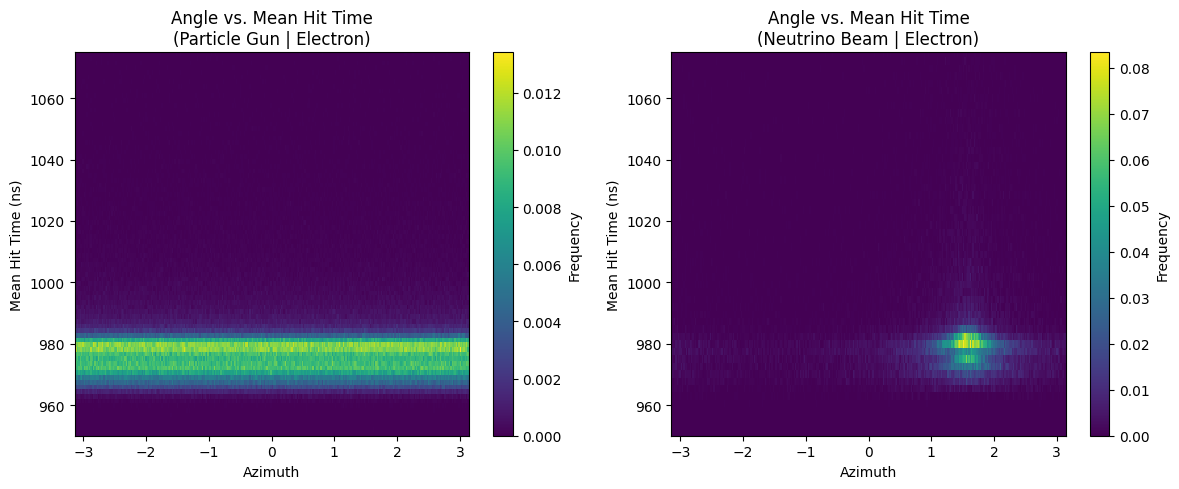

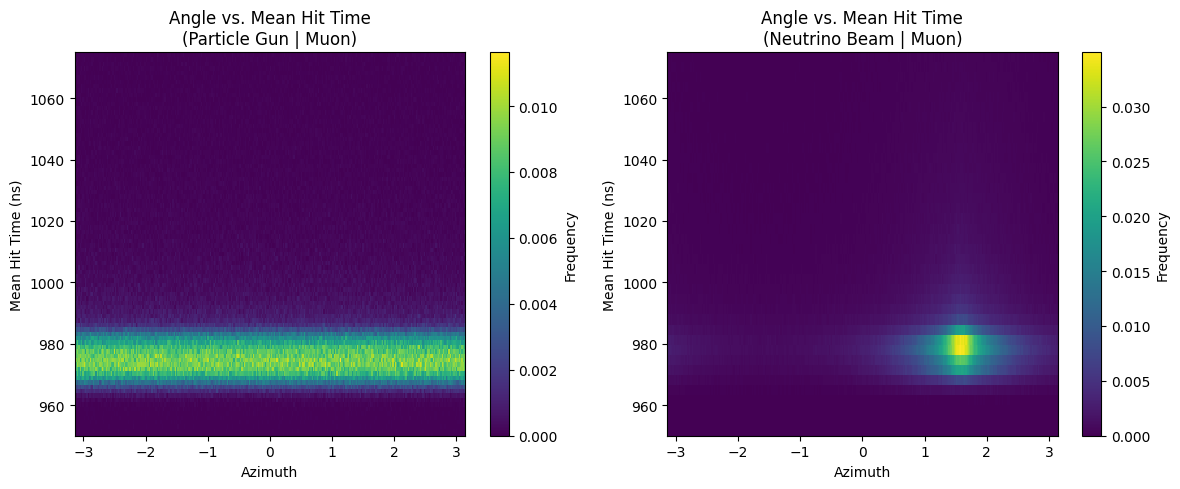

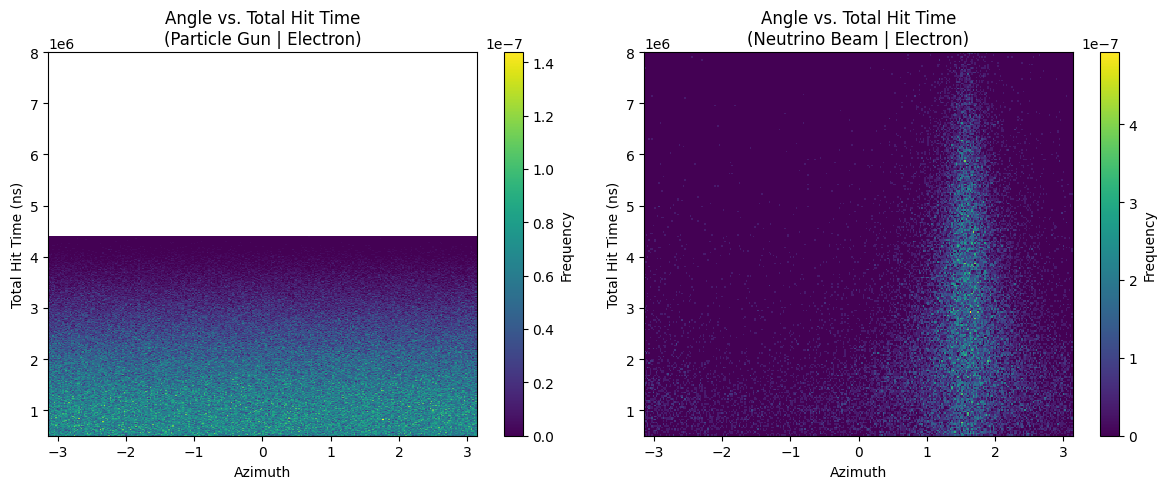

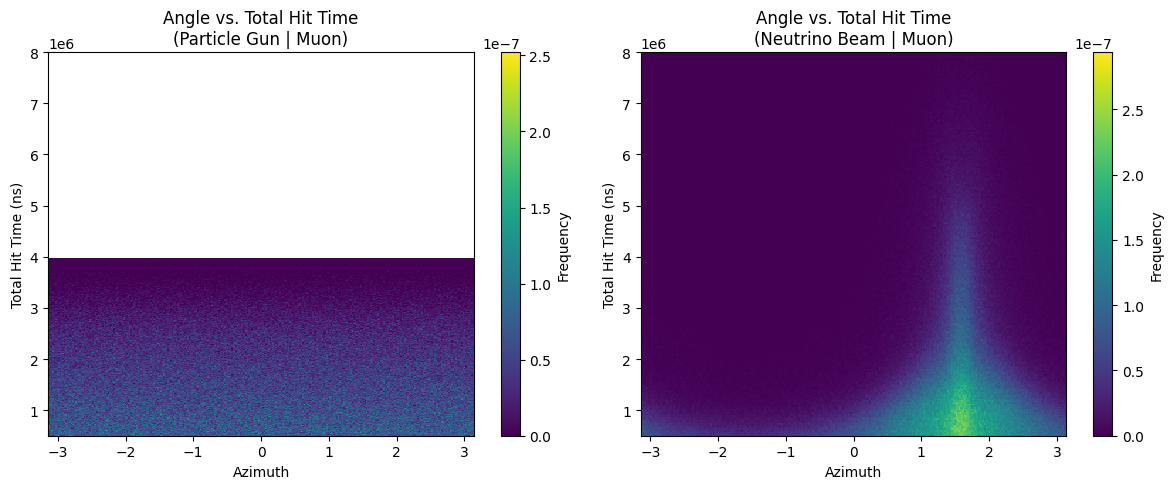

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 2 subplots side by side

# First subplot: Particle Gun
hist1 = axes[0].hist2d(
    dataPG.angles[idxs_electron_PG, 1],  
    mean_HT_e_PG,  
    bins=300,
    cmap="viridis",
    density=True  
)

fig.colorbar(hist1[3], ax=axes[0], label="Frequency")  # Add colorbar
axes[0].set_xlabel("Azimuth")  
axes[0].set_ylabel("Mean Hit Time (ns)")  
axes[0].set_title("Angle vs. Mean Hit Time\n(Particle Gun | Electron)")  
axes[0].set_ylim(950, 1075)  

# Second subplot: Neutrino Beam
hist2 = axes[1].hist2d(
    dataNB.angles[idxs_electron_NB, 1][mean_HT_e_NB_idx],  
    mean_HT_e_NB[mean_HT_e_NB_idx],  
    bins=300,
    cmap="viridis",
    density=True  
)

fig.colorbar(hist2[3], ax=axes[1], label="Frequency")  # Add colorbar
axes[1].set_xlabel("Azimuth")  
axes[1].set_ylabel("Mean Hit Time (ns)")  
axes[1].set_title("Angle vs. Mean Hit Time\n(Neutrino Beam | Electron)")  
axes[1].set_ylim(950, 1075)  

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

##################################

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 2 subplots side by side

# First subplot: Particle Gun
hist1 = axes[0].hist2d(
    dataPG.angles[idxs_muon_PG, 1],  
    mean_HT_mu_PG,  
    bins=300,
    cmap="viridis",
    density=True  
)

fig.colorbar(hist1[3], ax=axes[0], label="Frequency")  # Add colorbar
axes[0].set_xlabel("Azimuth")  
axes[0].set_ylabel("Mean Hit Time (ns)")  
axes[0].set_title("Angle vs. Mean Hit Time\n(Particle Gun | Muon)")  
axes[0].set_ylim(950, 1075)  

# Second subplot: Neutrino Beam
hist2 = axes[1].hist2d(
    dataNB.angles[idxs_muon_NB, 1][mean_HT_mu_NB_idx],  
    mean_HT_mu_NB[mean_HT_mu_NB_idx],  
    bins=300,
    cmap="viridis",
    density=True  
)

fig.colorbar(hist2[3], ax=axes[1], label="Frequency")  # Add colorbar
axes[1].set_xlabel("Azimuth")  
axes[1].set_ylabel("Mean Hit Time (ns)")  
axes[1].set_title("Angle vs. Mean Hit Time\n(Neutrino Beam | Muon)")  
axes[1].set_ylim(950, 1075)  

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#########
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 2 subplots side by side

# First subplot: Particle Gun
hist1 = axes[0].hist2d(
    dataPG.angles[idxs_electron_PG, 1][total_HT_e_PG_idx],  
    total_HT_e_PG[total_HT_e_PG_idx],  
    bins=300,
    cmap="viridis",
    density=True  
)

fig.colorbar(hist1[3], ax=axes[0], label="Frequency")  # Add colorbar
axes[0].set_xlabel("Azimuth")  
axes[0].set_ylabel("Total Hit Time (ns)")  
axes[0].set_title("Angle vs. Total Hit Time\n(Particle Gun | Electron)")  
axes[0].set_ylim(0.5e6, 8e6)  

# Second subplot: Neutrino Beam
hist2 = axes[1].hist2d(
    dataNB.angles[idxs_electron_NB, 1][total_HT_e_NB_idx],  
    total_HT_e_NB[total_HT_e_NB_idx],  
    bins=300,
    cmap="viridis",
    density=True  
)

fig.colorbar(hist2[3], ax=axes[1], label="Frequency")  # Add colorbar
axes[1].set_xlabel("Azimuth")  
axes[1].set_ylabel("Total Hit Time (ns)")  
axes[1].set_title("Angle vs. Total Hit Time\n(Neutrino Beam | Electron)")  
axes[1].set_ylim(0.5e6, 8e6)    

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

##################################

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 2 subplots side by side

# First subplot: Particle Gun
hist1 = axes[0].hist2d(
    dataPG.angles[idxs_muon_PG, 1][total_HT_mu_PG_idx],  
    total_HT_mu_PG[total_HT_mu_PG_idx],  
    bins=300,
    cmap="viridis",
    density=True  
)

fig.colorbar(hist1[3], ax=axes[0], label="Frequency")  # Add colorbar
axes[0].set_xlabel("Azimuth")  
axes[0].set_ylabel("Total Hit Time (ns)")  
axes[0].set_title("Angle vs. Total Hit Time\n(Particle Gun | Muon)")  
axes[0].set_ylim(0.5e6, 8e6)    

# Second subplot: Neutrino Beam
hist2 = axes[1].hist2d(
    dataNB.angles[idxs_muon_NB, 1][total_HT_mu_NB_idx],  
    total_HT_mu_NB[total_HT_mu_NB_idx],  
    bins=300,
    cmap="viridis",
    density=True  
)

fig.colorbar(hist2[3], ax=axes[1], label="Frequency")  # Add colorbar
axes[1].set_xlabel("Azimuth")  
axes[1].set_ylabel("Total Hit Time (ns)")  
axes[1].set_title("Angle vs. Total Hit Time\n(Neutrino Beam | Muon)")  
axes[1].set_ylim(0.5e6, 8e6)   

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [14]:
mean_CH_e_PG = []
mean_CH_mu_PG = []

mean_CH_e_NB = []
mean_CH_mu_NB = []

total_CH_e_PG = []
total_CH_mu_PG = []

total_CH_e_NB = []
total_CH_mu_NB = []

In [15]:
for i in idxs_electron_PG:
    
    dataPG[i]
    
    CHmean = np.mean(dataPG.event_hit_charges)
    CHtotal = np.sum(dataPG.event_hit_charges)
    
    mean_CH_e_PG.append(CHmean)
    total_CH_e_PG.append(CHtotal)
    
for i in idxs_muon_PG:
    
    dataPG[i]
    
    CHmean = np.mean(dataPG.event_hit_charges)
    CHtotal = np.sum(dataPG.event_hit_charges)
    
    mean_CH_mu_PG.append(CHmean)
    total_CH_mu_PG.append(CHtotal)


In [16]:
for i in idxs_electron_NB:
    
    dataNB[i]
    
    CHmean = np.mean(dataNB.event_hit_charges)
    CHtotal = np.sum(dataNB.event_hit_charges)
    
    mean_CH_e_NB.append(CHmean)
    total_CH_e_NB.append(CHtotal)
    
for i in idxs_muon_NB:
    
    dataNB[i]
    
    CHmean = np.mean(dataNB.event_hit_charges)
    CHtotal = np.sum(dataNB.event_hit_charges)

    mean_CH_mu_NB.append(CHmean)
    total_CH_mu_NB.append(CHtotal)


In [17]:
mean_CH_e_PG = np.array(mean_CH_e_PG)
mean_CH_mu_PG = np.array(mean_CH_mu_PG)

mean_CH_e_NB = np.array(mean_CH_e_NB)
mean_CH_mu_NB = np.array(mean_CH_mu_NB)

total_CH_e_PG = np.array(total_CH_e_PG)
total_CH_mu_PG = np.array(total_CH_mu_PG)

total_CH_e_NB = np.array(total_CH_e_NB)
total_CH_mu_NB = np.array(total_CH_mu_NB)

mean_CH_e_PG_idx = np.where(~np.isnan(mean_CH_e_PG))[0]
mean_CH_mu_PG_idx = np.where(~np.isnan(mean_CH_mu_PG))[0]
mean_CH_e_NB_idx = np.where(~np.isnan(mean_CH_e_NB))[0]
mean_CH_mu_NB_idx = np.where(~np.isnan(mean_CH_mu_NB))[0]
total_CH_e_PG_idx = np.where(~np.isnan(total_CH_e_PG))[0]
total_CH_mu_PG_idx = np.where(~np.isnan(total_CH_mu_PG))[0]
total_CH_e_NB_idx = np.where(~np.isnan(total_CH_e_NB))[0]
total_CH_mu_NB_idx = np.where(~np.isnan(total_CH_mu_NB))[0]


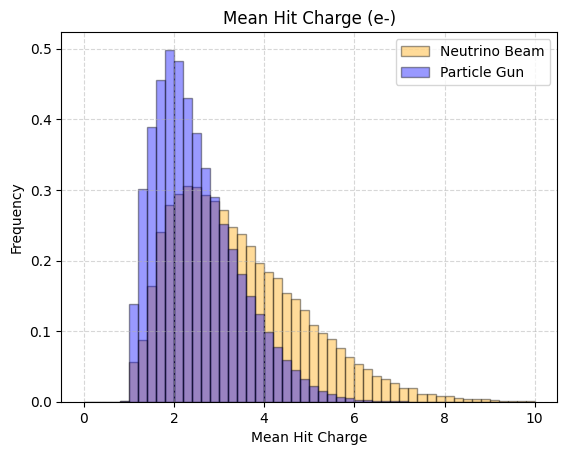

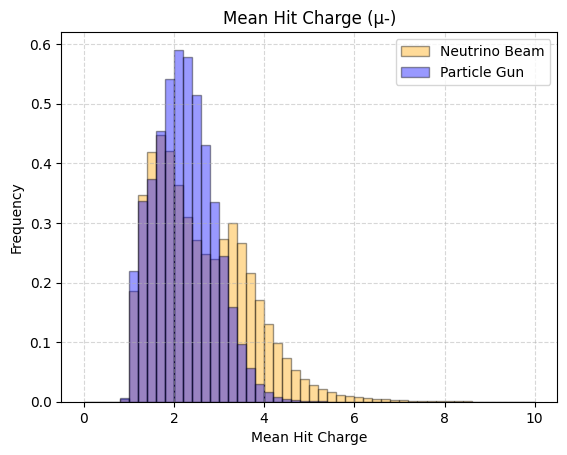

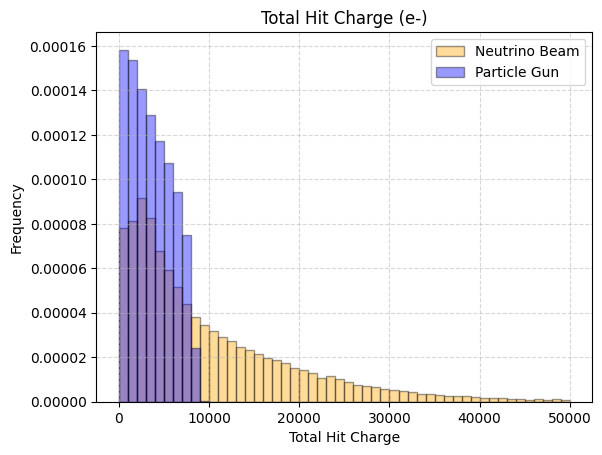

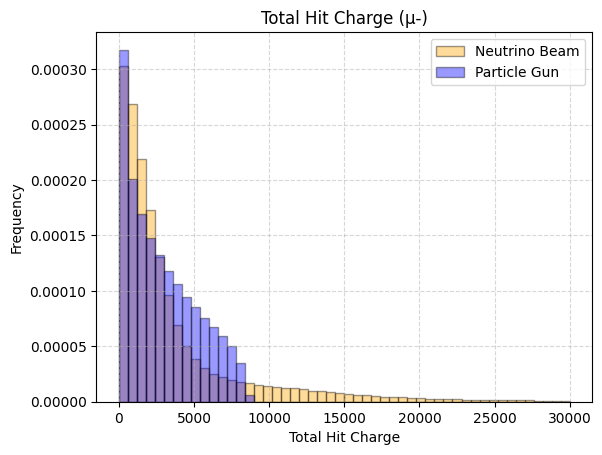

In [23]:
plt.hist(mean_CH_e_NB[mean_CH_e_NB_idx], bins=50, density=True, range = (0,10), alpha=0.4, color="orange", edgecolor="black", label="Neutrino Beam")  
plt.hist(mean_CH_e_PG[mean_CH_e_PG_idx], bins=50, density=True, range = (0,10), alpha=0.4, color="blue", edgecolor="black", label="Particle Gun")  
plt.xlabel("Mean Hit Charge")  
plt.ylabel("Frequency")  
plt.title("Mean Hit Charge (e-)")  
plt.grid(True, linestyle="--", alpha=0.5)  
plt.legend()
plt.show()

plt.hist(mean_CH_mu_NB[mean_CH_mu_NB_idx], bins=50, density=True, range = (0,10), alpha=0.4, color="orange", edgecolor="black", label="Neutrino Beam")  
plt.hist(mean_CH_mu_PG[mean_CH_mu_PG_idx], bins=50, density=True, range = (0,10), alpha=0.4, color="blue", edgecolor="black", label="Particle Gun")  
plt.xlabel("Mean Hit Charge")  
plt.ylabel("Frequency")  
plt.title("Mean Hit Charge (μ-)")  
plt.grid(True, linestyle="--", alpha=0.5)  
plt.legend()
plt.show()

plt.hist(total_CH_e_NB[total_CH_e_NB_idx], bins=50, density=True, range = (0,50000), alpha=0.4, color="orange", edgecolor="black", label="Neutrino Beam")  
plt.hist(total_CH_e_PG[total_CH_e_PG_idx], bins=50, density=True, range = (0,50000), alpha=0.4, color="blue", edgecolor="black", label="Particle Gun")  
plt.xlabel("Total Hit Charge")  
plt.ylabel("Frequency")  
plt.title("Total Hit Charge (e-)")  
plt.grid(True, linestyle="--", alpha=0.5)  
plt.legend()
plt.show()

plt.hist(total_CH_mu_NB[total_CH_mu_NB_idx], bins=50, density=True, range = (0,30000),alpha=0.4, color="orange", edgecolor="black", label="Neutrino Beam")  
plt.hist(total_CH_mu_PG[total_CH_mu_PG_idx], bins=50, density=True, range = (0,30000),alpha=0.4, color="blue", edgecolor="black", label="Particle Gun")  
plt.xlabel("Total Hit Charge")  
plt.ylabel("Frequency")  
plt.title("Total Hit Charge (μ-)")  
plt.grid(True, linestyle="--", alpha=0.5)  
plt.legend()
plt.show()


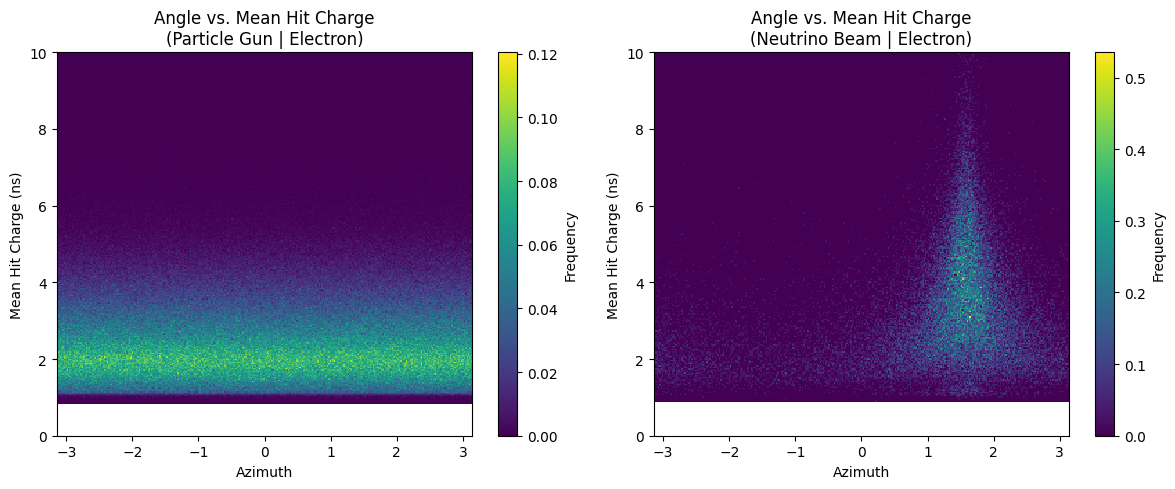

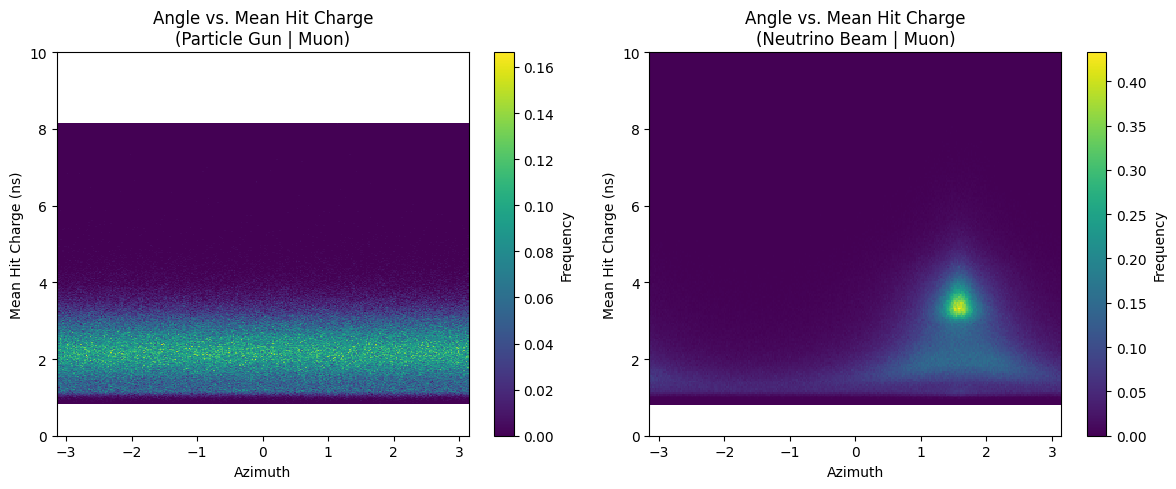

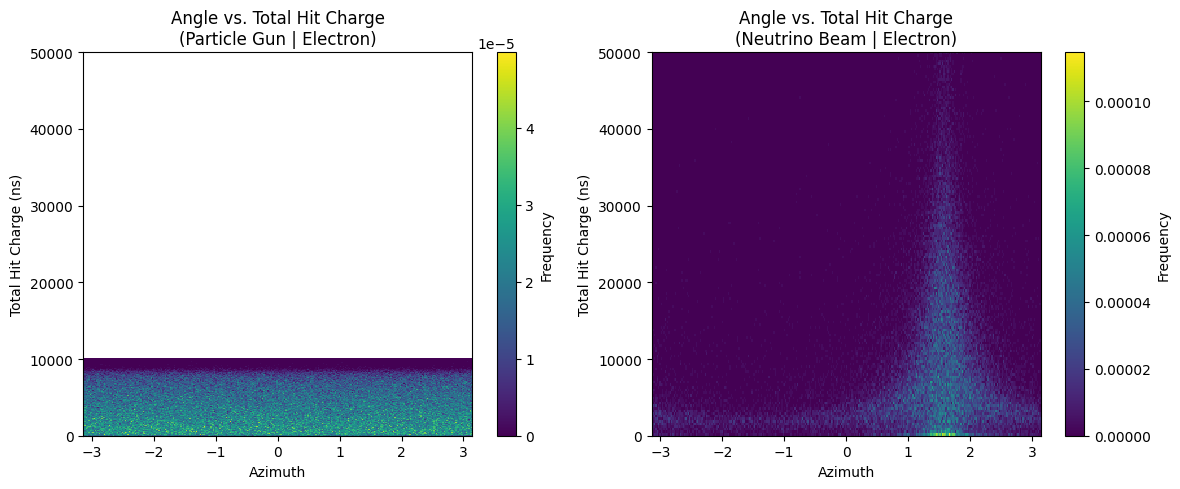

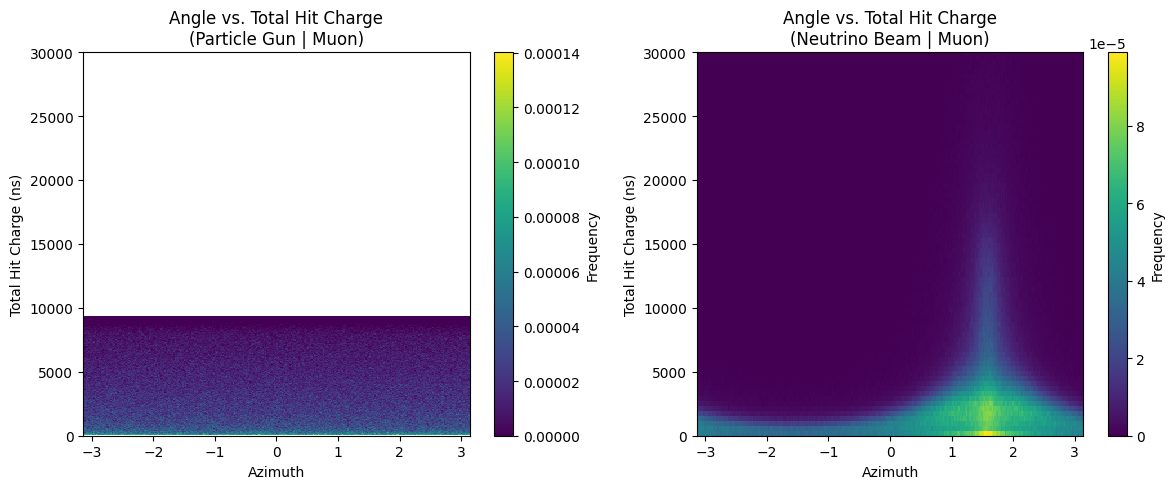

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 2 subplots side by side

# First subplot: Particle Gun
hist1 = axes[0].hist2d(
    dataPG.angles[idxs_electron_PG, 1],  
    mean_CH_e_PG,  
    bins=300,
    cmap="viridis",
    density=True  
)

fig.colorbar(hist1[3], ax=axes[0], label="Frequency")  # Add colorbar
axes[0].set_xlabel("Azimuth")  
axes[0].set_ylabel("Mean Hit Charge (ns)")  
axes[0].set_title("Angle vs. Mean Hit Charge\n(Particle Gun | Electron)")  
axes[0].set_ylim(0,10)  

# Second subplot: Neutrino Beam
hist2 = axes[1].hist2d(
    dataNB.angles[idxs_electron_NB, 1][mean_CH_e_NB_idx],  
    mean_CH_e_NB[mean_CH_e_NB_idx],  
    bins=300,
    cmap="viridis",
    density=True  
)

fig.colorbar(hist2[3], ax=axes[1], label="Frequency")  # Add colorbar
axes[1].set_xlabel("Azimuth")  
axes[1].set_ylabel("Mean Hit Charge (ns)")  
axes[1].set_title("Angle vs. Mean Hit Charge\n(Neutrino Beam | Electron)")  
axes[1].set_ylim(0,10)  

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

##################################

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 2 subplots side by side

# First subplot: Particle Gun
hist1 = axes[0].hist2d(
    dataPG.angles[idxs_muon_PG, 1],  
    mean_CH_mu_PG,  
    bins=300,
    cmap="viridis",
    density=True  
)

fig.colorbar(hist1[3], ax=axes[0], label="Frequency")  # Add colorbar
axes[0].set_xlabel("Azimuth")  
axes[0].set_ylabel("Mean Hit Charge (ns)")  
axes[0].set_title("Angle vs. Mean Hit Charge\n(Particle Gun | Muon)")  
axes[0].set_ylim(0,10)  

# Second subplot: Neutrino Beam
hist2 = axes[1].hist2d(
    dataNB.angles[idxs_muon_NB, 1][mean_CH_mu_NB_idx],  
    mean_CH_mu_NB[mean_CH_mu_NB_idx],  
    bins=300,
    cmap="viridis",
    density=True  
)

fig.colorbar(hist2[3], ax=axes[1], label="Frequency")  # Add colorbar
axes[1].set_xlabel("Azimuth")  
axes[1].set_ylabel("Mean Hit Charge (ns)")  
axes[1].set_title("Angle vs. Mean Hit Charge\n(Neutrino Beam | Muon)")  
axes[1].set_ylim(0,10) 

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#########

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 2 subplots side by side

# First subplot: Particle Gun
hist1 = axes[0].hist2d(
    dataPG.angles[idxs_electron_PG, 1][total_CH_e_PG_idx],  
    total_CH_e_PG[total_CH_e_PG_idx],  
    bins=300,
    cmap="viridis",
    density=True  
)

fig.colorbar(hist1[3], ax=axes[0], label="Frequency")  # Add colorbar
axes[0].set_xlabel("Azimuth")  
axes[0].set_ylabel("Total Hit Charge (ns)")  
axes[0].set_title("Angle vs. Total Hit Charge\n(Particle Gun | Electron)")  
axes[0].set_ylim(0,50000)  

# Second subplot: Neutrino Beam
hist2 = axes[1].hist2d(
    dataNB.angles[idxs_electron_NB, 1][total_CH_e_NB_idx],  
    total_CH_e_NB[total_CH_e_NB_idx],  
    bins=300,
    cmap="viridis",
    density=True  
)

fig.colorbar(hist2[3], ax=axes[1], label="Frequency")  # Add colorbar
axes[1].set_xlabel("Azimuth")  
axes[1].set_ylabel("Total Hit Charge (ns)")  
axes[1].set_title("Angle vs. Total Hit Charge\n(Neutrino Beam | Electron)")  
axes[1].set_ylim(0,50000)    

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

##################################

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 2 subplots side by side

# First subplot: Particle Gun
hist1 = axes[0].hist2d(
    dataPG.angles[idxs_muon_PG, 1][total_CH_mu_PG_idx],  
    total_CH_mu_PG[total_CH_mu_PG_idx],  
    bins=300,
    cmap="viridis",
    density=True  
)

fig.colorbar(hist1[3], ax=axes[0], label="Frequency")  # Add colorbar
axes[0].set_xlabel("Azimuth")  
axes[0].set_ylabel("Total Hit Charge (ns)")  
axes[0].set_title("Angle vs. Total Hit Charge\n(Particle Gun | Muon)")  
axes[0].set_ylim(0,30000)    

# Second subplot: Neutrino Beam
hist2 = axes[1].hist2d(
    dataNB.angles[idxs_muon_NB, 1][total_CH_mu_NB_idx],  
    total_CH_mu_NB[total_CH_mu_NB_idx],  
    bins=300,
    cmap="viridis",
    density=True  
)

fig.colorbar(hist2[3], ax=axes[1], label="Frequency")  # Add colorbar
axes[1].set_xlabel("Azimuth")  
axes[1].set_ylabel("Total Hit Charge (ns)")  
axes[1].set_title("Angle vs. Total Hit Charge\n(Neutrino Beam | Muon)")  
axes[1].set_ylim(0,30000)   

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
